In [1]:
import random

import torch
from torch import nn, optim
from torch.utils.data import DataLoader

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 100
n_epochs = 1000

number of samples: 1797
size of an image: 8 X 8


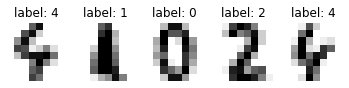

In [6]:
digits = datasets.load_digits()
imgs_train, imgs_test, targets_train, targets_test = train_test_split(digits.images, digits.target, test_size=0.1, random_state=0, shuffle=True)
dloader = DataLoader(dataset=list(zip(torch.from_numpy(imgs_train).float(), targets_train)), batch_size=batch_size, shuffle=True, drop_last=True)

print(f'number of samples: {(n_samples := len(digits.images))}')
print(f'size of an image: {len(digits.images[0])} X {len(digits.images[0][0])}')
for idx in range(1, 6):
    i = random.randint(0, n_samples - 1)

    plt.subplot(1, 5, idx)
    plt.title(f'label: {digits.target[i]}')
    plt.axis('off')
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')

In [7]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
).to(device)
loss_func = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-2)

for epoch in range(1, n_epochs + 1):
    loss_sum = 0
    n_batches = len(dloader)
    for imgs, targets in dloader:
        imgs = imgs.view(-1, 64).to(device)
        targets = targets.to(device)
        loss = loss_func(model(imgs), targets)

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        loss_sum += loss
    if epoch % 100 == 0:
        print(f'epoch: {epoch:04d}/{n_epochs}\tloss: {loss_sum / n_batches:.9f}')

epoch: 0100/1000	loss: 0.000066407
epoch: 0200/1000	loss: 0.000018212
epoch: 0300/1000	loss: 0.000006654
epoch: 0400/1000	loss: 0.000002737
epoch: 0500/1000	loss: 0.000001121
epoch: 0600/1000	loss: 0.000000478
epoch: 0700/1000	loss: 0.000000201
epoch: 0800/1000	loss: 0.000000085
epoch: 0900/1000	loss: 0.000000035
epoch: 1000/1000	loss: 0.000000014


accuracy: 0.9722222089767456


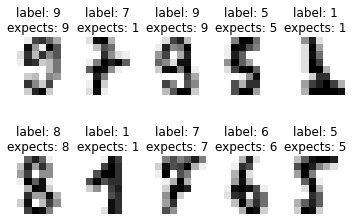

In [18]:
with torch.no_grad():
    imgs = torch.from_numpy(imgs_test).view(-1, 64).float().to(device)
    targets = torch.from_numpy(targets_test).to(device)
    is_correct = torch.argmax(model(imgs), dim=1) == targets
    print(f'accuracy: {is_correct.float().mean().item()}')

    for idx in range(1, 11):
        i = random.randint(0, len(targets))

        plt.subplot(2, 5, idx)
        plt.title(f'label: {targets[i]}\nexpects: {torch.argmax(model(imgs[i]))}')
        plt.axis('off')
        plt.imshow(imgs_test[i], cmap=plt.cm.gray_r, interpolation='nearest')

References:
[[Recognizing hand-written digits](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)]
[[다층 퍼셉트론으로 손글씨 분류하기](https://wikidocs.net/61046)]